# Exploration

Let's explore the interactions of all attributes and target variable to help discover drivers of our target variable. 

> "Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypotheses, and to check assumptions with the help of summary statistics and graphical representations." - Prasad Patil

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import wrangle

## Acquire and Prepare Data

We will use the function we created and stored in our wrangle file to quickly acquire and prepare our student grades data.

In [2]:
# Use our function from wrangle to acquire and prepare our data.

df = wrangle.wrangle_grades()
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100,90,95,96
1,2,98,93,96,95
2,3,85,83,87,87
3,4,83,80,86,85
4,5,93,90,96,97


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   student_id   102 non-null    int64
 1   exam1        102 non-null    int64
 2   exam2        102 non-null    int64
 3   exam3        102 non-null    int64
 4   final_grade  102 non-null    int64
dtypes: int64(5)
memory usage: 4.8 KB


In [4]:
# No duplicate student_id values.

df.student_id.nunique()

102

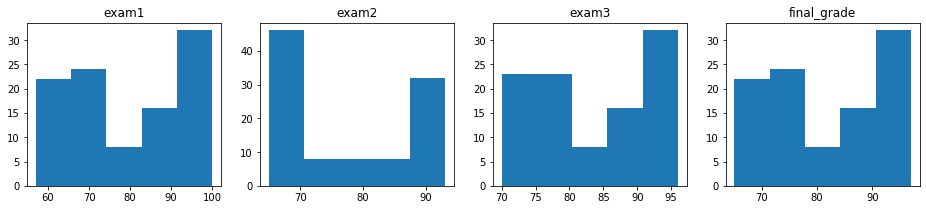

In [5]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['exam1', 'exam2', 'exam3', 'final_grade']

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,4, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    df[col].hist(bins=5)
    
    # Hide gridlines.
    plt.grid(False)

#### Distribution Takeaways

- All of the column distributions are bimodal. There seem to be more students scoring on the upper and lower edges than in the middle 80s.
- `exam3` has the highest median score, `exam1` and `final_grade` look to have the same or very similar medians, and `exam2` has the lowest median score.
- `exam2` has the least students scoring in the upper half of the grade range and the most scoring in the lower half.
- `exam1` and `final_grade` distributions look very similar in these initial charts although `exam1` has a larger range in scores than `final_grade`.

___

## Main Stages in Exploration

Let's check out the main stages in performing Exploratory Data Analysis, EDA, and run through some guidance for each stage. 

> “A hypothesis may be simply defined as a guess. A scientific hypothesis is an intelligent guess.” – Isaac Asimov

**Hypothesize:** Form and document your initial hypotheses about how the predictors (independent variables, features, or attributes) interact with the target (y-value or dependent variable).
- Document your initial hypotheses. Write them down so they're concrete and not in your head.

**Visualize:** Use visualization techniques (scatterplot, jointplot, pairgrid, heatmap) to identify drivers. Sometimes a visualization is so powerful that it can suffice in identifying a driver all on its own. Other times, a visualization needs to be followed up with a statistical test. When in doubt, follow up with the appropriate test. 
- Plot out the distributions of each feature. *This is critical b/c many of our statisitical tools and machine learning algorithms assume certain distributions. If your data isn't remotely normally distributed, then avoid using any tools that assume normally distributed data.*
- Plot out the interaction of 2 or more variables.
- Plot out how subgroups compare to each-other and to the overall population.
- Document any surprises you may find in visualizing. This means write down your takeaways; documenting your takeaways is a huge component of your final deliverable/analysis. 
- Identitfy features that correlate with each other. If feature A and feature B are each tightly correlated with the target variable, but they're also tightly correlated with each other, we should use one feature that correlates better, rather than use both. 

**Test Your Hypotheses:** Analyze the drivers of a continuous target variable using the appropriate statistical tests (t-tests, correlation, and chi-squared hypothesis tests).
> "Hypothesis generation is a process beginning with an educated guess whereas hypothesis testing is a process to conclude that the educated guess is true/false or the relationship between the variables is statistically significant or not." [source](https://www.analyticsvidhya.com/blog/2020/09/hypothesis-generation-data-science-projects/)
- Document your hypothesis test results. That means writing up when the tests reject the null hypothesis or fail to reject your null hypothesis for each hypothesis you make.

___

## Types of Visualizations

Here is a breakdown of visualization by type with some code useful snippets. Below, let's use the appropriate visualizations on our student grades dataset.

- **Univariate Distributions**
    - Check out the distributions of a single variable at a time using pandas built-in plotting function to create a historgram or Seaborn `displot`, `boxplot`, or `countplot`; this can be done before splitting our data if we want.
    - **Continuous variable distributions**
    ```python
     df.[col].hist(grid=False, bins=10)
     sns.displot(x, data)
     sns.boxplot(data)
     ```
     - **Discrete variable distributions**
     ```python
     sns.countplot(x='discrete_var', data)
     ```

- **Continuous with Continuous**
    - Seaborn `pairplot` to create a scatter matrix visualizing all continous variable relationships along with individiual distributions.
    ```python
    sns.pairplot(data)
    ```
    - Seaborn `relplot` for a simple scatter plot of two continuous variables.
    ```python
    sns.relplot(x, y, data, kind=scatter)
    ```
    - Seaborn `lmplot` for a simple scatter plot of two continous variables with a regression line. I can pass a discrete variable to `col` or `hue` to bring in another dimension, too.
    ```python
    sns.lmplot(x, y, data, scatter=True, hue=None, col=None)
    ```
    - Seaborn `jointplot` for a simple scatter plot of two continuous variables with a regression line and the addition of a histogram for each variable.
    ```python
    sns.jointplot(x, y, data, kind=scatter)
    ```
    - Seaborn `heatmap` of Correlation Coefficients for all numeric columns in a dataset.
    ```python
    sns.heatmap(train.corr())
    ```

- **Discrete with Continuous**
    - Seaborn `swarmplot` or `stripplot` to examine a discrete variable by a continuous.
    ```python
    sns.swarmplot(x='discrete_var', y='continuous_var', data=train)
    sns.stripplot(x='discrete_var', y='continuous_var', data=train)
    ```
    - Seaborn `boxplot`, `violinplot`, or `barplot` to show the distribution of a continuous variable by a discrete variable.
    ```python
    sns.boxplot(x='discrete_var', y='continuous_var', data=train)
    sns.violinplot(x='discrete_var', y='continuous_var', data=train)
    sns.barplot(x='discrete_var', y='continuous_var', data=train)
    ```

- **Discrete with Discrete**
    - Seaborn `heatmap` with a pandas `crosstab` to examine discrete variables with discrete.
    ```python
    ctab = pd.crosstab(index, columns, values)
    sns.heatmap(ctab, annot=True)
    ```

Let's take a look at some common chart types by variable types.

___

### Split Data

Before we explore bi- and multi-variate relationships, we *must* split our data to avoid leakage of unseen data.

In [6]:
# Split into train, validate, and test sets; notice that we are keeping X and Y together so far.

train, validate, test = wrangle.split_continuous(df)

train -> (56, 5)
validate -> (25, 5)
test -> (21, 5)


___

## Goal

Let's keep our goal from our student grades scenario in mind here.
> I'm a university professor hoping I can build a prediction model that will be able to use these exams to predict the final grade within 5 points average per student.

Since my target variable is continuous, `final_grade`, this is a regression problem. It's important to remember that Multiple linear regression analysis makes several key assumptions:

- There must be a linear relationship between the outcome variable and the independent variables.  *Scatterplots can show whether there is a linear or curvilinear relationship.*
- No Multicollinearity—Multiple regression assumes that the independent variables are not highly correlated with each other.
- Multivariate Normality–Multiple regression assumes that the residuals are normally distributed.

## Hypothesize

- My Null Hypothesis is that there is no correlation between the grades for `exam1` and `final grade`.
- My Alternative Hypothesis is that `exam1`is correlated with `final grade`.

## Visualize and Test

- To test my hypothesis, I'm going to create some visualizations and test statistics with my student grades data.
- At the same time, I'll be checking that the key assumptions for multiple linear regression are met.

___

### `sns.heatmap()`

Let's look at a heatmap of the correlation coefficients for a dataset. [Here](https://towardsdatascience.com/all-about-heatmaps-bb7d97f099d7 ) is an aritcle with lots of heatmap customization options.

- First, I need to calculate the correlation coefficient for each pair of variables.
- Pandas `.corr()` method allows me to quickly create a correlation matrix by computing pairwise correlation of columns. By default, `method=pearson`.
- I can change the `.corr()` argument to `method=spearman` if my variables are not normally distributed. Want to know more about the difference between pearson's r and spearman's rank? [This article](https://towardsdatascience.com/clearly-explained-pearson-v-s-spearman-correlation-coefficient-ada2f473b8) is short, sweet, and to the point.

In [7]:
# Create the correlation matrix for all exams.

exam_corr = train.drop(columns=['student_id']).corr()
exam_corr

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.933110,0.940733,0.986033
exam2,0.933110,1.000000,0.937750,0.930982
exam3,0.940733,0.937750,1.000000,0.949790
final_grade,0.986033,0.930982,0.949790,1.000000


- Next, I pass my correlation matrix to Seaborn's `heatmap` along with any customization I want to perform.

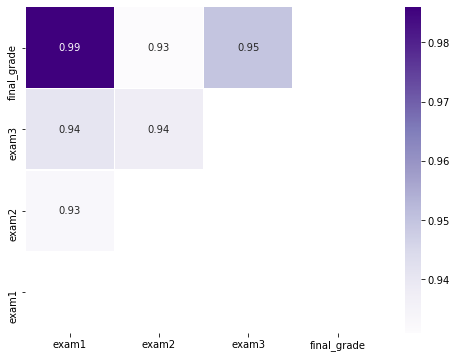

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(exam_corr, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(exam_corr))
plt.ylim(0, 4)

plt.show()

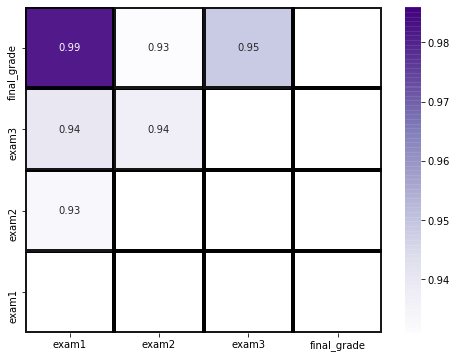

In [9]:
# Pass my correlation matrix to Seaborn's heatmap.

kwargs = {'alpha':.9,'linewidth':3, 'linestyle':'-', 
          'linecolor':'k','rasterized':False, 'edgecolor':'w', 
          'capstyle':'projecting',}

plt.figure(figsize=(8,6))
sns.heatmap(exam_corr, cmap='Purples', annot=True, mask= np.triu(exam_corr), **kwargs)
plt.ylim(0, 4)

plt.show()

In [10]:
# Use a scipy stats function pearsonr to calculate the correlation coefficient and the p-value.

r, p_value = pearsonr(train.exam1, train.final_grade)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.9860332649385697
P-value: 1.006510436697437e-43


In [11]:
# Since my variables are not normally distributed, I might choose Spearman instead.

exam_spearman = train.drop(columns=['student_id']).corr(method='spearman')
exam_spearman

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.940463,0.918660,0.987083
exam2,0.940463,1.000000,0.929203,0.910915
exam3,0.918660,0.929203,1.000000,0.930853
final_grade,0.987083,0.910915,0.930853,1.000000


- My numbers come out pretty close to the same here.

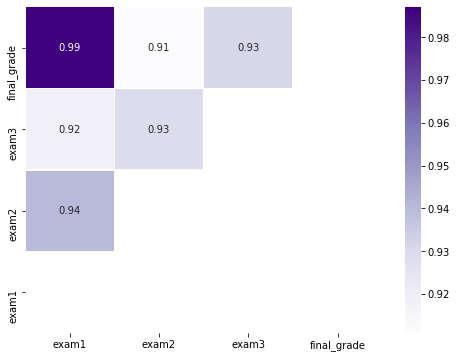

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(exam_spearman, cmap='Purples', annot=True, linewidth=0.5, mask= np.triu(exam_corr))
plt.ylim(0, 4)

plt.show()

In [13]:
# Use a scipy stats function spearmanr to calculate the correlation coefficient and the p-value.

r, p_value = spearmanr(train.exam1, train.final_grade)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

Correlation Coefficient: 0.9870830318356753
P-value: 1.2369246014330318e-44


#### Heatmap Takeaways

- Although all of the exams have very high positive correlations with the target variable, `exam1` and `final_grade` are almost perfectly correlated. This looks to be the best predictor of our target variable.
- Based on my correlation coefficient and my p-value, **I reject my Null hypothesis that there is no correlation between `exam1` and `final_grade`.**
- Looking at the correlation between our independent variables, they also have high positive correlations with each other, multicollinearity. This informs me that I don't want to use all of them together in a linear regression model. 
- I will choose `exam1` and perform a simple linear regression first. If I want to go back and do some feature engineering with my other independent variables, I could do that and see if I can improve on my accuracy.

### `sns.relplot()`

Let's do a simple scatter plot of two continuous variables in our dataset.

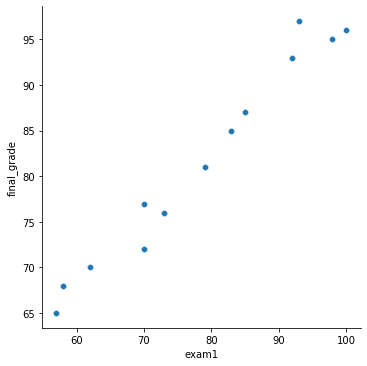

In [14]:
sns.relplot(x="exam1", y="final_grade", data=train)
plt.show()

### `sns.lmplot()`

Let's make that simple scatter plot but add a regression line.

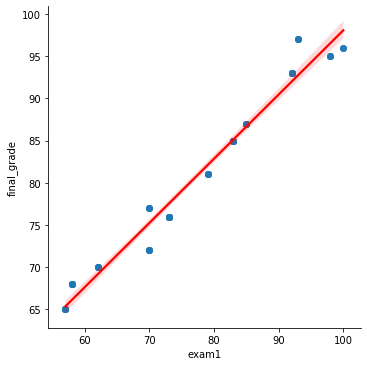

In [15]:
# I can really pop that line color if I want.

sns.lmplot(x="exam1", y="final_grade", data=train, line_kws={'color': 'red'})
plt.show()

### `sns.jointplot()`

Let's use a `sns.jointplot()` with `kind=reg` to view individual variable distributions for our x and y along with a scatter plot with regression line.

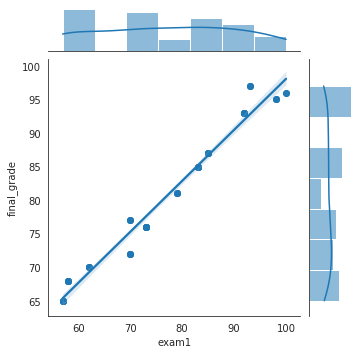

In [16]:
with sns.axes_style('white'):
    j = sns.jointplot(x="exam1", y="final_grade", data=train,  kind='reg', height=5);
plt.show()

#### Takeaways

- My `relplot`, `lmplot`, and `joinplots` charts show me that there is a linear relationship between `exam1` and `final_grade`.

### `sns.pairplot()`

Let's use `sns.pairplot()` to view a scatter plot visualizing the relationships between all of the numeric columns in our dataset all at once as well as individual distributions for each individual column.

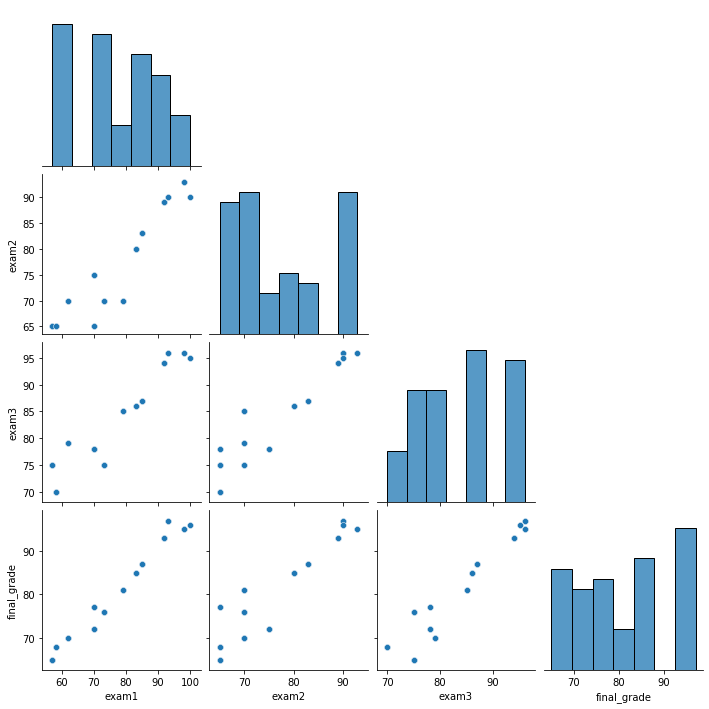

In [17]:
# We can drop the redundant information in the upper right half of the chart if we like.

sns.pairplot(train[['exam1', 'exam2', 'exam3', 'final_grade']], corner=True)
plt.show()

## Additional thoughts
- Identify if there are logical/domain/cultural cutoffs in continuous variables that would allow us to treat them as categorial values. For example, 98.45 and 99.1 are both an A or an A+ grade in most scales.
- If there's a logical cutoff point, like a grade of 70 or a voting age of 18, we can make a boolean to go along with a continuous value. This can allow us to gain additional insight in visualizing distributions between groups.

In [18]:
print(f'{(train.exam1 < 70).sum()} students failed exam1.')
print(f'{(train.exam2 < 70).sum()} students failed exam2.')
print(f'{(train.exam3 < 70).sum()} students failed exam3.')
print(f'{((train.exam1 < 70) & (train.exam2 < 70)).sum()} students failed exam1 and exam2.')
print(f'{(train.final_grade < 70).sum()} students failed the final.')

14 students failed exam1.
13 students failed exam2.
0 students failed exam3.
10 students failed exam1 and exam2.
10 students failed the final.


In [20]:
failed_1 = train[train.exam1 < 70].student_id
failed_2 = train[train.exam2 < 70].student_id
failed_1_and_2 = train[(train.exam1 < 70) & (train.exam2 < 70)].student_id
failed_1_or_2 = train[(train.exam1 < 70) | (train.exam2 < 70)]
failed_final = train[train.final_grade < 70].student_id

In [21]:
# 100% of students who failed exams 1 and 2 failed the final.

failed_1_and_2.isin(failed_final)

24     True
101    True
10     True
75     True
36     True
89     True
63     True
76     True
50     True
49     True
Name: student_id, dtype: bool

In [22]:
failed_1_not_2 = failed_1[~failed_1.isin(failed_2)]
print(f'{len(failed_1_not_2)} students failed exam1 but not exam2.')
failed_1_not_2

4 students failed exam1 but not exam2.


87    88
61    62
35    36
74    75
Name: student_id, dtype: int64

In [23]:
failed_2_not_1 = failed_2[~failed_2.isin(failed_1)]
print(f'{len(failed_2_not_1)} students failed exam2 but not exam1.')
failed_2_not_1

3 students failed exam2 but not exam1.


86     87
99    100
47     48
Name: student_id, dtype: int64

In [24]:
# Students who only failed exam1 or exam2 passed the final.

failed_1_or_2_df = train[((train.exam1 < 70) | (train.exam2 < 70))]
failed_1_or_2[failed_1_or_2.final_grade > 69]

,student_id,exam1,exam2,exam3,final_grade
87,88,62,70,79,70
61,62,62,70,79,70
35,36,62,70,79,70
86,87,70,65,78,77
99,100,70,65,78,77
74,75,62,70,79,70
47,48,70,65,78,77


#### Additional Thoughts Takeaways

- I could create a new feature of boolean values to identify students who failed exam1 and exam2.

## Further Reading

- [Visualization with Seaborn Demos](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)
- <https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15>
- <https://www.itl.nist.gov/div898/handbook/index.htm>
- <https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/>
- Boxplot vs. Violin example https://matplotlib.org/3.2.1/gallery/statistics/boxplot_vs_violin.html
- https://datavizcatalogue.com/

___

## Exercises I - Required

Our Telco scenario continues:

As a customer analyst for Telco, you want to know who has spent the most money with the company over their lifetime. You have monthly charges and tenure, so you think you will be able to use those two attributes as features to estimate total charges. You need to do this within an average of $5.00 per customer. 

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

Do your work in a notebook named `explore.ipynb`. In addition, you should create a file named `explore.py` that contains the following functions for exploring your variables (features & target).

1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

1. Write a function named `plot_variable_pairs` that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

1. Write a function named `months_to_years` that accepts your telco churn dataframe and returns a dataframe with a new feature `tenure_years`, in complete years as a customer.

1. Write a function named `plot_categorical_and_continuous_vars` that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

1. Save the functions you have written to create visualizations in your `explore.py` file. Rewrite your notebook code so that you are using the functions imported from this file.

1. Explore your dataset with any other visualizations you think will be helpful.

1. In a seperate notebook, use the functions you have developed in this exercise with the `mall_customers` dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make `spending_score` your target variable.

___

## Exercises II - Challenge

Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

1. Use the functions you created above to explore your Zillow train dataset in your `explore.ipynb` notebook.

1. Come up with some initial hypotheses based on your goal of predicting property value.

1. Visualize all combinations of variables in some way.

1. Run the appropriate statistical tests where needed.

1. What independent variables are correlated with the dependent variable, home value?

1. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

1. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.